<a href="https://colab.research.google.com/github/ethancraycroft/MLA_ETC/blob/main/FinalProject_Classification_ETC(noPairPlot).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/nba_games_stats.csv')

In [ ]:
df


,Team,Date,Home,Opponent,WINLOSS,TeamPoints,OppPoints,FGs,FGAs,FGP,...,OppFTM,OppFTA,OppFTP,OppOR,OppTR,OppA,OppS,OppBl,OppTOs,OppTFs
0,ATL,10/29/14,Away,TOR,L,102,109,40,80,0.500,...,27,33,0.818,16,48,26,13,9,9,22
1,ATL,11/1/14,Home,IND,W,102,92,35,69,0.507,...,18,21,0.857,11,44,25,5,5,18,26
2,ATL,11/5/14,Away,SAS,L,92,94,38,92,0.413,...,27,38,0.711,11,50,25,7,9,19,15
3,ATL,11/7/14,Away,CHO,L,119,122,43,93,0.462,...,20,27,0.741,11,51,31,6,7,19,30
4,ATL,11/8/14,Home,NYK,W,103,96,33,81,0.407,...,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,WAS,4/3/18,Away,HOU,L,104,120,38,72,0.528,...,18,27,0.667,10,46,26,13,3,9,14
9836,WAS,4/5/18,Away,CLE,L,115,119,47,94,0.500,...,22,28,0.786,5,35,26,10,3,16,14
9837,WAS,4/6/18,Home,ATL,L,97,103,35,87,0.402,...,16,23,0.696,7,50,24,5,5,18,22
9838,WAS,4/10/18,Home,BOS,W,113,101,41,83,0.494,...,22,27,0.815,13,44,22,14,1,16,18


In [ ]:
df.describe()

,TeamPoints,OppPoints,FGs,FGAs,FGP,3PM,3PA,3PP,FT,FTA,...,OppFTM,OppFTA,OppFTP,OppOR,OppTR,OppA,OppS,OppBl,OppTOs,OppTFs
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.00000,9840.000000,...,9840.00000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,103.652337,103.652337,38.602439,84.902439,0.455689,9.126829,25.623679,0.354321,17.32063,22.749390,...,17.32063,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,12.188043,12.188043,5.029992,7.130043,0.054711,3.598084,7.102501,0.097782,6.00262,7.390451,...,6.00262,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,64.000000,64.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,1.00000,1.000000,...,1.00000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,95.000000,95.000000,35.000000,80.000000,0.418000,7.000000,21.000000,0.290000,13.00000,18.000000,...,13.00000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,103.000000,103.000000,38.000000,85.000000,0.455000,9.000000,25.000000,0.353000,17.00000,22.000000,...,17.00000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,112.000000,112.000000,42.000000,89.000000,0.494000,11.000000,30.000000,0.419000,21.00000,27.000000,...,21.00000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,149.000000,149.000000,58.000000,129.000000,0.684000,25.000000,61.000000,0.750000,44.00000,64.000000,...,44.00000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Team        9840 non-null   object 
 1   Date        9840 non-null   object 
 2   Home        9840 non-null   object 
 3   Opponent    9840 non-null   object 
 4   WINLOSS     9840 non-null   object 
 5   TeamPoints  9840 non-null   int64  
 6   OppPoints   9840 non-null   int64  
 7   FGs         9840 non-null   int64  
 8   FGAs        9840 non-null   int64  
 9   FGP         9840 non-null   float64
 10  3PM         9840 non-null   int64  
 11  3PA         9840 non-null   int64  
 12  3PP         9840 non-null   float64
 13  FT          9840 non-null   int64  
 14  FTA         9840 non-null   int64  
 15  FTP         9840 non-null   float64
 16  OR          9840 non-null   int64  
 17  TR          9840 non-null   int64  
 18  A           9840 non-null   int64  
 19  S           9840 non-null  

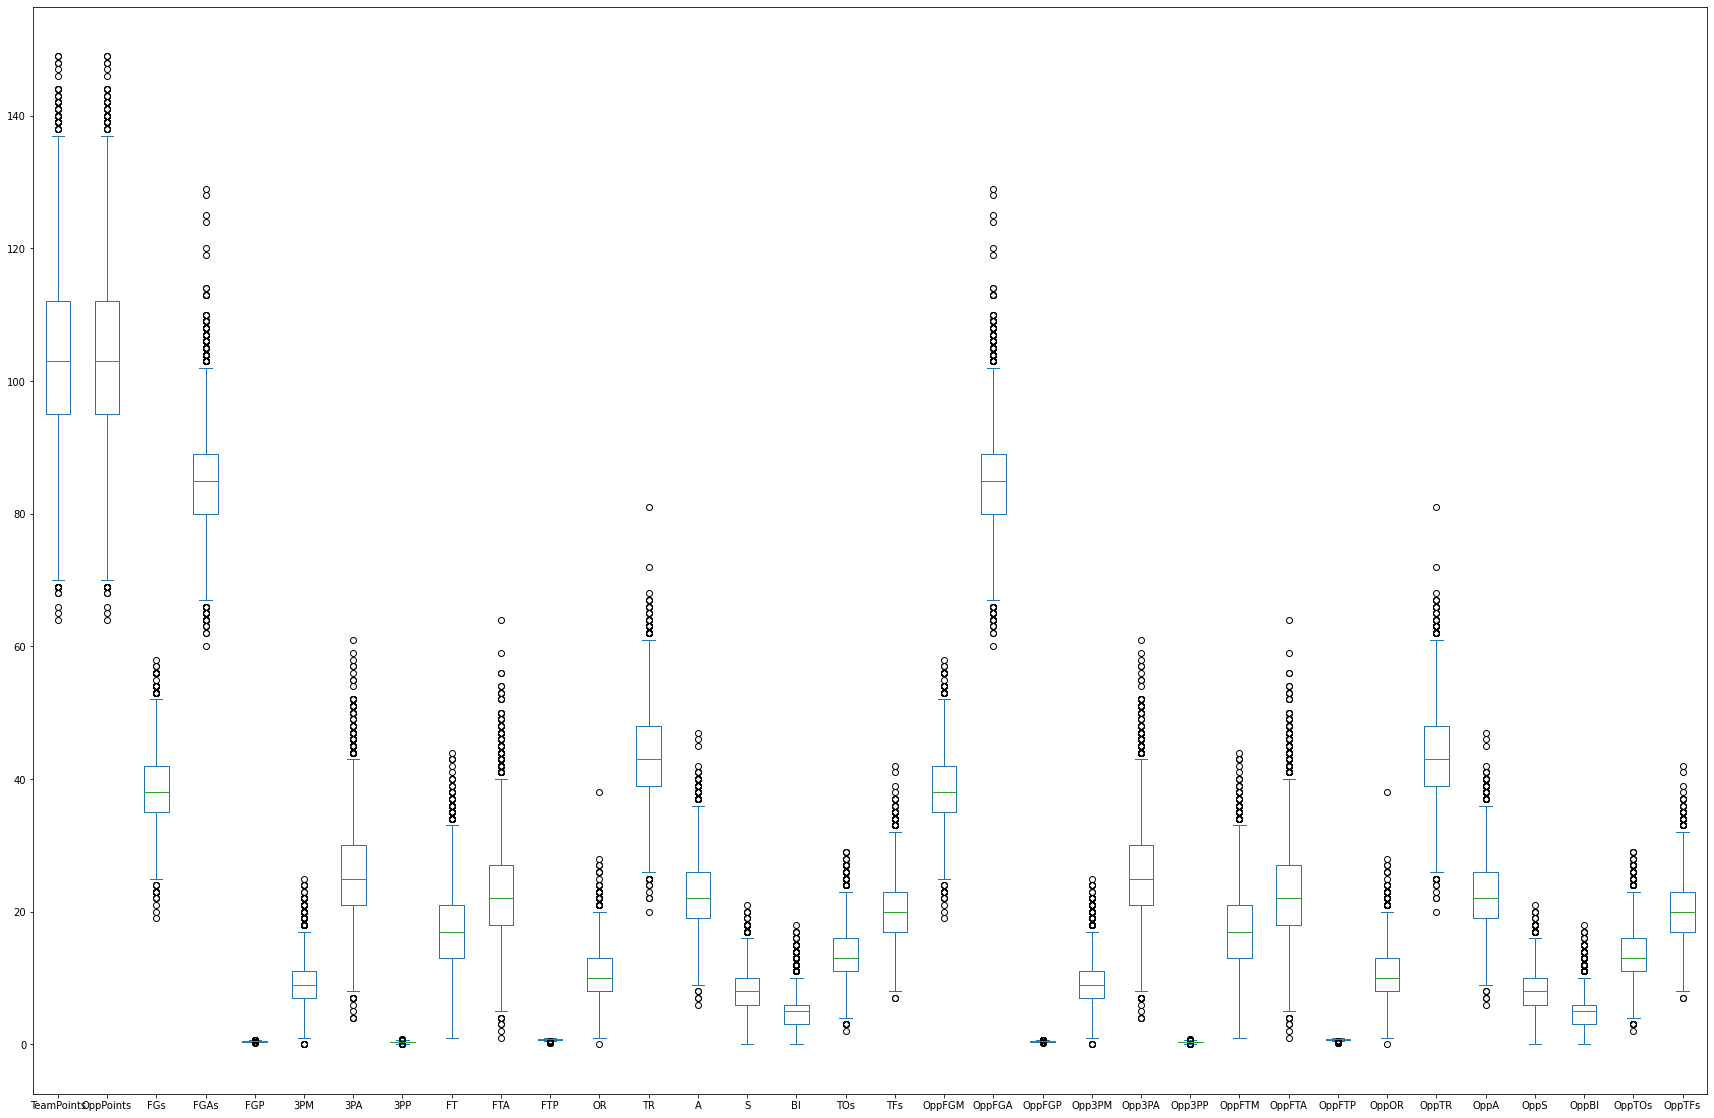

In [ ]:
df.plot(kind='box',figsize=(30,20))

#LOGISTIC REGRESSION

In [ ]:
df['WINLOSS'] = df['WINLOSS'].apply(lambda x: 1 if x == "W" else 0) 


In [ ]:
df

,Team,Date,Home,Opponent,WINLOSS,TeamPoints,OppPoints,FGs,FGAs,FGP,...,OppFTM,OppFTA,OppFTP,OppOR,OppTR,OppA,OppS,OppBl,OppTOs,OppTFs
0,ATL,10/29/14,Away,TOR,0,102,109,40,80,0.500,...,27,33,0.818,16,48,26,13,9,9,22
1,ATL,11/1/14,Home,IND,1,102,92,35,69,0.507,...,18,21,0.857,11,44,25,5,5,18,26
2,ATL,11/5/14,Away,SAS,0,92,94,38,92,0.413,...,27,38,0.711,11,50,25,7,9,19,15
3,ATL,11/7/14,Away,CHO,0,119,122,43,93,0.462,...,20,27,0.741,11,51,31,6,7,19,30
4,ATL,11/8/14,Home,NYK,1,103,96,33,81,0.407,...,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,WAS,4/3/18,Away,HOU,0,104,120,38,72,0.528,...,18,27,0.667,10,46,26,13,3,9,14
9836,WAS,4/5/18,Away,CLE,0,115,119,47,94,0.500,...,22,28,0.786,5,35,26,10,3,16,14
9837,WAS,4/6/18,Home,ATL,0,97,103,35,87,0.402,...,16,23,0.696,7,50,24,5,5,18,22
9838,WAS,4/10/18,Home,BOS,1,113,101,41,83,0.494,...,22,27,0.815,13,44,22,14,1,16,18


In [ ]:
X = df.iloc[:,7:]
X

,FGs,FGAs,FGP,3PM,3PA,3PP,FT,FTA,FTP,OR,...,OppFTM,OppFTA,OppFTP,OppOR,OppTR,OppA,OppS,OppBl,OppTOs,OppTFs
0,40,80,0.500,13,22,0.591,9,17,0.529,10,...,27,33,0.818,16,48,26,13,9,9,22
1,35,69,0.507,7,20,0.350,25,33,0.758,3,...,18,21,0.857,11,44,25,5,5,18,26
2,38,92,0.413,8,25,0.320,8,11,0.727,10,...,27,38,0.711,11,50,25,7,9,19,15
3,43,93,0.462,13,33,0.394,20,26,0.769,7,...,20,27,0.741,11,51,31,6,7,19,30
4,33,81,0.407,9,22,0.409,28,36,0.778,12,...,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,38,72,0.528,12,25,0.480,16,23,0.696,3,...,18,27,0.667,10,46,26,13,3,9,14
9836,47,94,0.500,9,21,0.429,12,14,0.857,12,...,22,28,0.786,5,35,26,10,3,16,14
9837,35,87,0.402,9,25,0.360,18,23,0.783,9,...,16,23,0.696,7,50,24,5,5,18,22
9838,41,83,0.494,15,30,0.500,16,20,0.800,10,...,22,27,0.815,13,44,22,14,1,16,18


In [ ]:
y = df[['WINLOSS']]
y

,WINLOSS
0,0
1,1
2,0
3,0
4,1
...,...
9835,0
9836,0
9837,0
9838,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=10)

In [ ]:
X_train

,FGs,FGAs,FGP,3PM,3PA,3PP,FT,FTA,FTP,OR,...,OppFTM,OppFTA,OppFTP,OppOR,OppTR,OppA,OppS,OppBl,OppTOs,OppTFs
475,44,87,0.506,15,32,0.469,24,29,0.828,12,...,23,33,0.697,15,42,18,6,6,16,22
2785,28,81,0.346,12,33,0.364,30,35,0.857,9,...,20,28,0.714,4,48,27,8,5,12,23
8406,44,79,0.557,10,25,0.400,15,20,0.750,4,...,13,16,0.813,13,37,21,9,4,12,21
9414,38,83,0.458,14,36,0.389,25,30,0.833,9,...,11,16,0.688,10,46,24,6,4,11,24
6984,44,94,0.468,12,28,0.429,16,17,0.941,11,...,30,38,0.789,5,38,18,7,7,9,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,45,88,0.511,18,41,0.439,9,12,0.750,7,...,34,42,0.810,7,35,14,13,2,12,17
7291,33,72,0.458,10,25,0.400,19,31,0.613,7,...,13,16,0.813,14,45,12,8,1,14,23
1344,40,90,0.444,11,25,0.440,5,10,0.500,13,...,14,16,0.875,13,49,19,5,5,12,16
7293,39,74,0.527,13,23,0.565,15,19,0.789,7,...,15,17,0.882,7,29,10,8,5,7,20


In [ ]:
num_attribs = ['FGs', 'FGAs', 'FGP', '3PM', '3PA', '3PP', 'FT', 'FTA', 'FTP', 'OR', 'TR', 'A', 'S', 'Bl', 'TOs', 'TFs', 'OppFGM', 'OppFGA', 'OppFGP', 'Opp3PM', 'Opp3PA', 'Opp3PP', 'OppFTM', 'OppFTA', 'OppFTP', 'OppOR', 'OppTR', 'OppA', 'OppS', 'OppBl', 'OppTOs', 'OppTFs']

col_transform_log = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs),]
                  )

In [ ]:
pipeline_log = Pipeline([
                     ('trans', col_transform_log),
                     ('mlr_log', LogisticRegression(max_iter=1000)),
                     ])

In [ ]:
pipeline_log.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['FGs', 'FGAs', 'FGP', '3PM',
                                                   '3PA', '3PP', 'FT', 'FTA',
                                                   'FTP', 'OR', 'TR', 'A', 'S',
                                                   'Bl', 'TOs', 'TFs', 'OppFGM',
                                                   'OppFGA', 'OppFGP', 'Opp3PM',
                                                   'Opp3PA', 'Opp3PP', 'OppFTM',
                                                   'OppFTA', 'OppFTP', 'OppOR',
                                                   'OppTR', 'OppA', 'OppS',
                                                   'OppBl', ...])])),
                ('mlr_log', LogisticRegression(max_iter=1000))])

In [ ]:
y_pred = pipeline_log.predict(X_test)

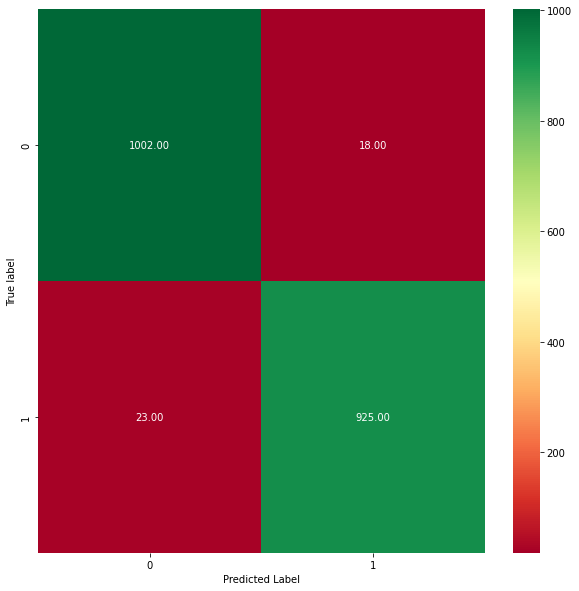

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

plot_cm(y_test, y_pred)

Calculate the Precision, Recall, F1 Score, Accuracy and Contingency tables for both models. Also generate an ROC or Precision-Recall Curve as appropriate and explain your decision.

In [ ]:
print("Precision Score: ", precision_score(y_test,y_pred))
print("Recall Score: ", recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

Precision Score:  0.9809119830328739
Recall Score:  0.9757383966244726
F1 Score:  0.9783183500793231


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1025
           1       0.98      0.98      0.98       943

    accuracy                           0.98      1968
   macro avg       0.98      0.98      0.98      1968
weighted avg       0.98      0.98      0.98      1968



In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

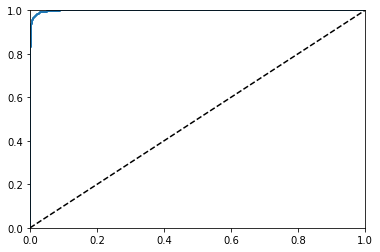

In [ ]:
y_pred_prob = pipeline_log.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fpr, tpr)

In [ ]:
area_under_curve = roc_auc_score(y_test, y_pred_prob)
area_under_curve

0.9984725324729048

I decided to use the ROC curve because of the number of positives given from this model. Precision-Recall curve should only be used when the positive class is rare - or when you care more about the false positives than the false negatives. With these results, the positive class is not rare, so I went with the ROC curve. The results of this curve are close to perfect. An AUC of 0.998 is very very good and it makes me feel comfortable with this model.

#DECISION TREE with gridsearch


In [ ]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV


In [ ]:
X_DT = df.iloc[:,7:]
X_DT

,FGs,FGAs,FGP,3PM,3PA,3PP,FT,FTA,FTP,OR,...,OppFTM,OppFTA,OppFTP,OppOR,OppTR,OppA,OppS,OppBl,OppTOs,OppTFs
0,40,80,0.500,13,22,0.591,9,17,0.529,10,...,27,33,0.818,16,48,26,13,9,9,22
1,35,69,0.507,7,20,0.350,25,33,0.758,3,...,18,21,0.857,11,44,25,5,5,18,26
2,38,92,0.413,8,25,0.320,8,11,0.727,10,...,27,38,0.711,11,50,25,7,9,19,15
3,43,93,0.462,13,33,0.394,20,26,0.769,7,...,20,27,0.741,11,51,31,6,7,19,30
4,33,81,0.407,9,22,0.409,28,36,0.778,12,...,8,11,0.727,13,44,26,2,6,15,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9835,38,72,0.528,12,25,0.480,16,23,0.696,3,...,18,27,0.667,10,46,26,13,3,9,14
9836,47,94,0.500,9,21,0.429,12,14,0.857,12,...,22,28,0.786,5,35,26,10,3,16,14
9837,35,87,0.402,9,25,0.360,18,23,0.783,9,...,16,23,0.696,7,50,24,5,5,18,22
9838,41,83,0.494,15,30,0.500,16,20,0.800,10,...,22,27,0.815,13,44,22,14,1,16,18


In [ ]:
y_DT = df[['WINLOSS']]
y_DT

,WINLOSS
0,0
1,1
2,0
3,0
4,1
...,...
9835,0
9836,0
9837,0
9838,1


In [ ]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT,y_DT, test_size=.20, random_state=4)


In [ ]:
num_attribs_DT = ['FGs', 'FGAs', 'FGP', '3PM', '3PA', '3PP', 'FT', 'FTA', 'FTP', 'OR', 'TR', 'A', 'S', 'Bl', 'TOs', 'TFs', 'OppFGM', 'OppFGA', 'OppFGP', 'Opp3PM', 'Opp3PA', 'Opp3PP', 'OppFTM', 'OppFTA', 'OppFTP', 'OppOR', 'OppTR', 'OppA', 'OppS', 'OppBl', 'OppTOs', 'OppTFs']

col_transform_DT = ColumnTransformer(transformers=[
                               ('num',MinMaxScaler(), num_attribs_DT),]
                  )

In [ ]:
pipeline_DT = Pipeline([
                     ('transform', col_transform_DT),
                     ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                     ])

In [ ]:
pipeline_DT.fit(X_train,np.ravel(y_train))


Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['FGs', 'FGAs', 'FGP', '3PM',
                                                   '3PA', '3PP', 'FT', 'FTA',
                                                   'FTP', 'OR', 'TR', 'A', 'S',
                                                   'Bl', 'TOs', 'TFs', 'OppFGM',
                                                   'OppFGA', 'OppFGP', 'Opp3PM',
                                                   'Opp3PA', 'Opp3PP', 'OppFTM',
                                                   'OppFTA', 'OppFTP', 'OppOR',
                                                   'OppTR', 'OppA', 'OppS',
                                                   'OppBl', ...])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

In [ ]:
y_pred_DT = pipeline_DT.predict(X_test_DT)

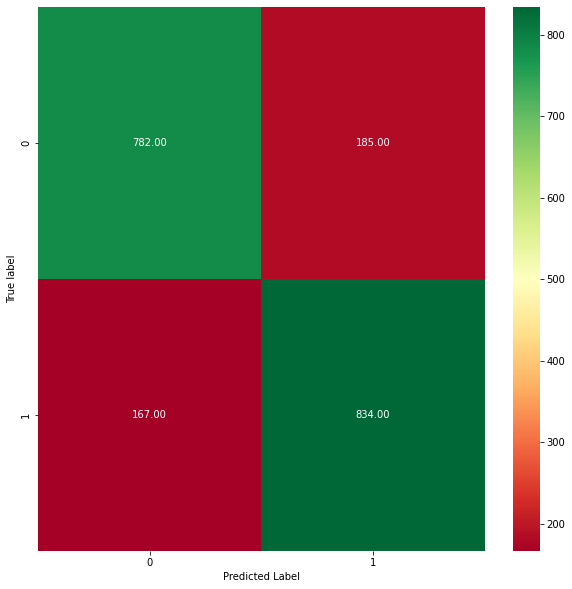

In [ ]:
plot_cm(y_test_DT,y_pred_DT)


In [ ]:
print("Precision: ", precision_score(y_test_DT,y_pred_DT))  
print("Recall:", recall_score(y_test_DT,y_pred_DT))
print("F1 Score:", f1_score(y_test_DT,y_pred_DT))

Precision:  0.8184494602551521
Recall: 0.8331668331668332
F1 Score: 0.8257425742574257


In [ ]:
def plot_roc_curve(fpr_DT,tpr_DT):
  plt.plot(fpr_DT, tpr_DT, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

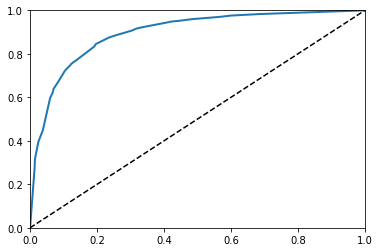

In [ ]:
y_pred_prob_DT = pipeline_DT.predict_proba(X_test_DT)[::,1]
fpr_DT, tpr_DT, _ = roc_curve(y_test_DT,y_pred_prob_DT)
plot_roc_curve(fpr_DT, tpr_DT)

In [ ]:
area_under_curve_DT = roc_auc_score(y_test_DT, y_pred_prob_DT)
area_under_curve_DT

0.8959551307017697

I decided to use the ROC curve because of the number of positives given from this model. Precision-Recall curve should only be used when the positive class is rare - or when you care more about the false positives than the false negatives. With these results, the positive class is not rare, so I went with the ROC curve. The results of this curve are good. An AUC close to 0.9 is very good and for this curve I got 0.896.

In [ ]:
param_grid = {'decision_tree__criterion':['gini','entropy'],'decision_tree__max_depth':[5,10,15,20]}  

In [ ]:
grid_pipeline = GridSearchCV(pipeline_DT, param_grid)


In [ ]:
grid_pipeline.fit(X_train_DT, y_train_DT)


GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['FGs',
                                                                          'FGAs',
                                                                          'FGP',
                                                                          '3PM',
                                                                          '3PA',
                                                                          '3PP',
                                                                          'FT',
                                                                          'FTA',
                                                                          'FTP',
                                                 

In [ ]:
grid_pipeline.best_params_


{'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 15}

In [ ]:
dt = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20)
dt.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [ ]:
y_pred_DT = dt.predict(X_test_DT)


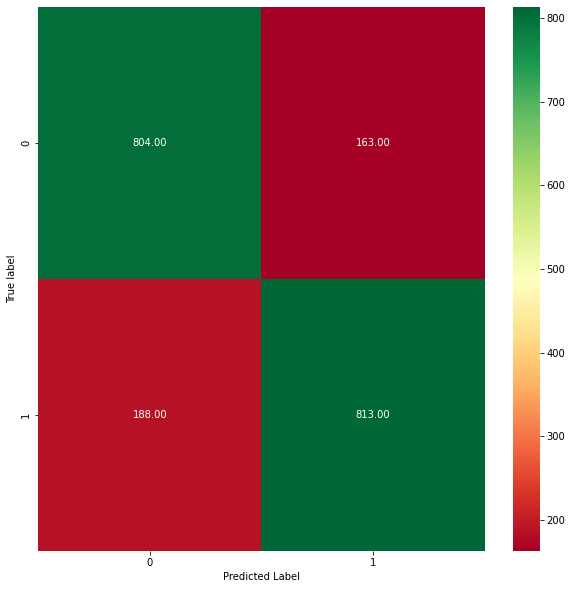

In [ ]:
plot_cm(y_test_DT,y_pred_DT)


In [ ]:
print("Precision: ", precision_score(y_test_DT,y_pred_DT))  
print("Recall:", recall_score(y_test_DT,y_pred_DT))
print("F1 Score:", f1_score(y_test_DT,y_pred_DT))

Precision:  0.8329918032786885
Recall: 0.8121878121878122
F1 Score: 0.8224582701062216


In [ ]:
print(classification_report(y_pred_DT, y_test_DT))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       992
           1       0.81      0.83      0.82       976

    accuracy                           0.82      1968
   macro avg       0.82      0.82      0.82      1968
weighted avg       0.82      0.82      0.82      1968



#CONCLUSION

For this dataset, I would be much more comfortable using the logistic regression model to predict Wins and Losses over the decision tree model. The Logistic regression model passed with flying colors. In the confusion matrix, we see that the number of false negatives and false positives is *extremely* low compared to the number of true positives and true negatives. This is reflected in the models precision, recall, and F1 numbers – all above 0.975. The closer to 1 the better, and these numbers all came very close to 1. The accuracy and contingency table showed that this model had very high accuracy too – 0.98. After plotting the ROC curve, the area under the curve was 0.998 – almost a perfect 1. All of these results lead to the conclusion that the logistic regression would be a very safe and reliable choice for determining wins and losses. 

The Decision Tree Model was pretty good, but not even close to the logistic regression model. Under the Decision Tree Model, there was a worse ratio of false results to true results. This is reflected in the worse precision, recall, and F1 numbers. These 3 numbers for the Decision Tree model range from 0.818-0.833. These numbers are still respectable, but not as impressive as those from the logistic regression model. After plotting the roc curve, the area under the curve was ~0.896. This is a solid number, but again – not as good as the logistic regression model’s. 
